# Lab 7

Ali Tejani, amt3639

Caroline Yao, chy253

Allen Hwang, ah45755

## Problem 1.   
The  dataset  you  played  on  the  Kaggle  competition  was  derived  from  this  dataset https://www.kaggle.com/c/GiveMeSomeCredit/data.  As you can see, you were predicting who
will have a serious Deliquency on their loan.  If someone is a high-risk individual (i.e.  the model
predicts y= 1 they would be denied a loan).

### 1.
Identify  and  name  the  real  features  in  the  in-class  Kaggle  training dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import xgboost
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in data
train = pd.read_csv('inputs/train_final.csv', index_col = 'id')
trainX = train.loc[:,'F1':]
trainY = train['Y']
testX = pd.read_csv('inputs/test_final.csv', index_col = 'id')

In [3]:
realData = pd.read_csv('inputs/cs-training.csv', index_col=0)

In [4]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

RevolvingUtilizationOfUnsecuredLines


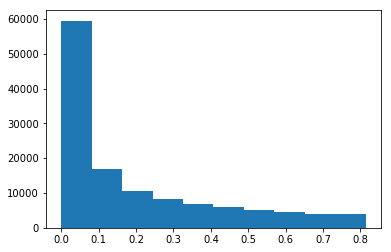

age


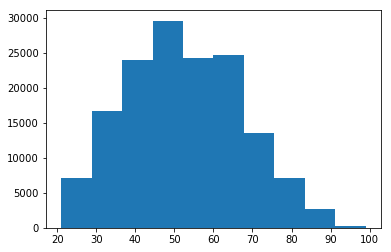

NumberOfTime30-59DaysPastDueNotWorse


C:\Users\Ali\Anaconda2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in divide
C:\Users\Ali\Anaconda2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in divide
C:\Users\Ali\Anaconda2\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater


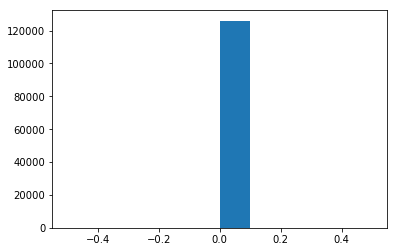

DebtRatio


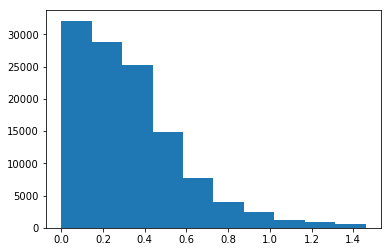

MonthlyIncome


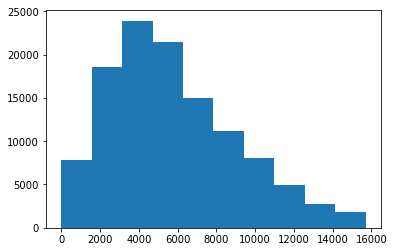

NumberOfOpenCreditLinesAndLoans


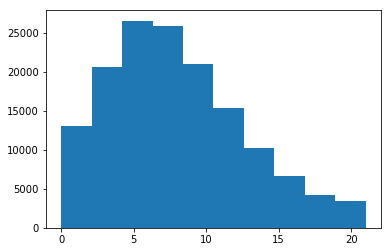

NumberOfTimes90DaysLate


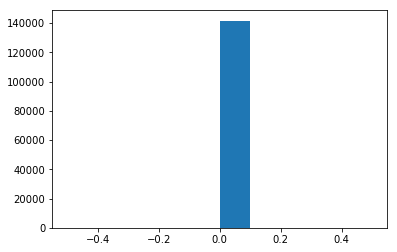

NumberRealEstateLoansOrLines


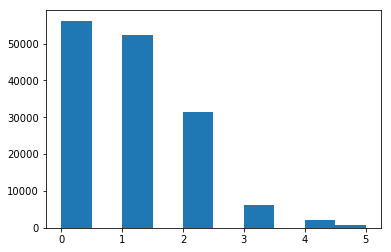

NumberOfTime60-89DaysPastDueNotWorse


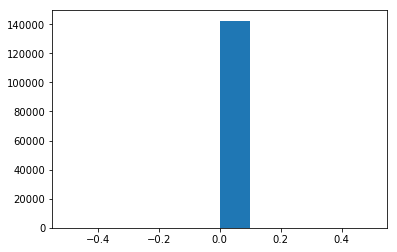

NumberOfDependents


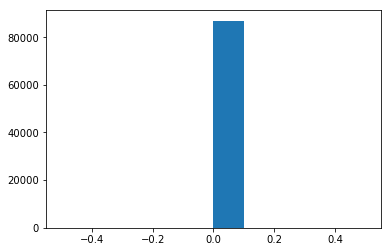

In [11]:
r1 = realData[realData.columns[1:]]
for col in r1:
    print col
    c = r1[col].dropna()
    c = c[~is_outlier(c,thresh=3)]
    plt.hist(c,bins=10)
    plt.show()

### 2. Model interpretability
What is the effect of MonthlyIncome to the prediction?  Quantify as much as you can how 1000, 2000 or 3000 extra per month affect the probablity of deliquency.  Do this by fitting a simple model on the dataset and using your best model.

In [5]:
X = pd.concat([trainX,testX])
X1 = X[[a for a in X.columns if a != 'F5' and a != 'F19']]
Y1 = X['F5'][X['F5'].notnull()]
Y2 = X['F19'][X['F19'].notnull()]
f5train = X1[X['F5'].notnull()]
f19train = X1[X['F19'].notnull()]
f5test = X1[X['F5'].isnull()]
f19test = X1[X['F19'].isnull()]
enet = ElasticNetCV(alphas=[0.1,1,5,10],l1_ratio=[0.01,0.1,0.3,0.5,0.7,0.9])
enet.fit(f5train,Y1)
yf5 = enet.predict(f5test)
enet = ElasticNetCV(alphas=[0.1,1,5,10],l1_ratio=[0.01,0.1,0.3,0.5,0.7,0.9])
enet.fit(f19train,Y2)
yf19 = enet.predict(f19test)

In [6]:
Yt5 = X['F5'][X['F5'].isnull()]
df = pd.Series(yf5,index=Yt5.index)
X['F5'] = X['F5'].fillna(df)
Yt19 = X['F19'][X['F19'].isnull()]
df = pd.Series(yf19,index=Yt19.index)
X['F19'] = X['F19'].fillna(df)

In [7]:
trainX = X[:49998]
testX = X[49998:]

In [8]:
xgb = XGBClassifier( learning_rate=0.01, n_estimators=5000, max_depth=3,
 min_child_weight=5, gamma=0.3, subsample=0.9, colsample_bytree=0.6,
 reg_alpha=.05,reg_lambda=50,
 objective= 'binary:logistic', scale_pos_weight=1)
param = xgb.get_params()
xgbtrain = xgboost.DMatrix(trainX.values,label=trainY.values)
cv = xgboost.cv(param,xgbtrain,num_boost_round=param['n_estimators'],nfold=5,metrics='auc', early_stopping_rounds=50)
xgb.set_params(n_estimators=cv.shape[0])
xgb.fit(trainX,trainY,eval_metric='auc')
xgb.score(trainX,trainY)

0.93799751990079605

### 3. 
What is the most important variable in predicting deliquency? What is the most importantpair of variables? Make a data science argument supported by data.

### 4.
The  Age  Discrimination  in  Employment  Act  (ADEA)  forbids  age  discrimination  against people who are age 40 or older.  Look at the best models you used in your Kaggle competion.  Were they discriminating against older people? Make the best argument you can.

### 5.
Your manager asks if the number of dependents in the family (spouse, no of children) has an effect on loan deliquency. What does the data say? Calculate a p-value to express how confident you are.

## Problem 2.

### a) 
Create two random variables that are uncorrelated but dependent.

### b 
Create two continuous random variables X, Y so that X and Y are strongly dependent but the best linear regression fit y = β1x+β0 has the optimal β1 = 0. Show a scatter plot ofx, ypairs.